<a href="https://colab.research.google.com/github/Msurya-05/surya/blob/main/day2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Saving noise.jpg to noise.jpg


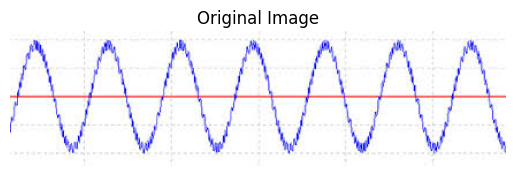

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
from PIL import Image

image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

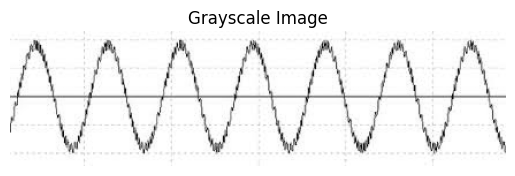

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

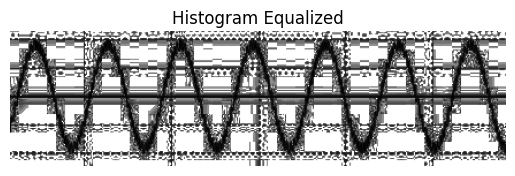

In [ ]:
hist_eq = cv2.equalizeHist(gray)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

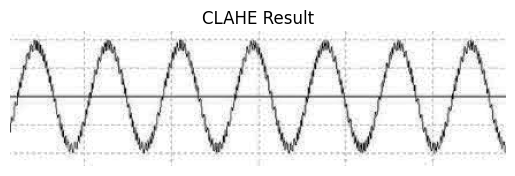

In [ ]:
#Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_eq = clahe.apply(gray)
plt.imshow(clahe_eq, cmap='gray')
plt.title("CLAHE Result")
plt.axis("off")
plt.show()

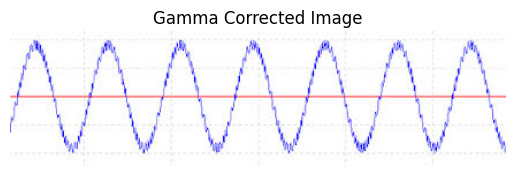

In [ ]:
#Gamma Correction
gamma = 1.5
invGamma = 1.0 / gamma
table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_corrected = cv2.LUT(img, table)

plt.imshow(gamma_corrected)
plt.title("Gamma Corrected Image")
plt.axis("off")
plt.show()

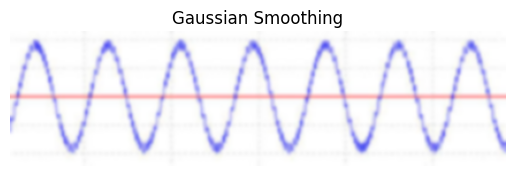

In [ ]:
gaussian = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(gaussian)
plt.title("Gaussian Smoothing")
plt.axis("off")
plt.show()

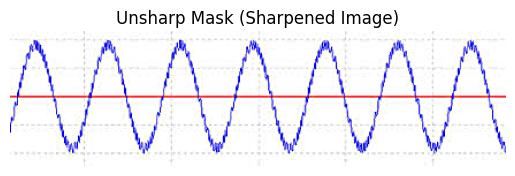

In [ ]:
gaussian_blur = cv2.GaussianBlur(img, (9, 9), 10.0)
unsharp_image = cv2.addWeighted(img, 1.5, gaussian_blur, -0.5, 0)

plt.imshow(unsharp_image)
plt.title("Unsharp Mask (Sharpened Image)")
plt.axis("off")
plt.show()

/tmp/ipython-input-21-3891815163.py:21: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(gray) + 1e-6)


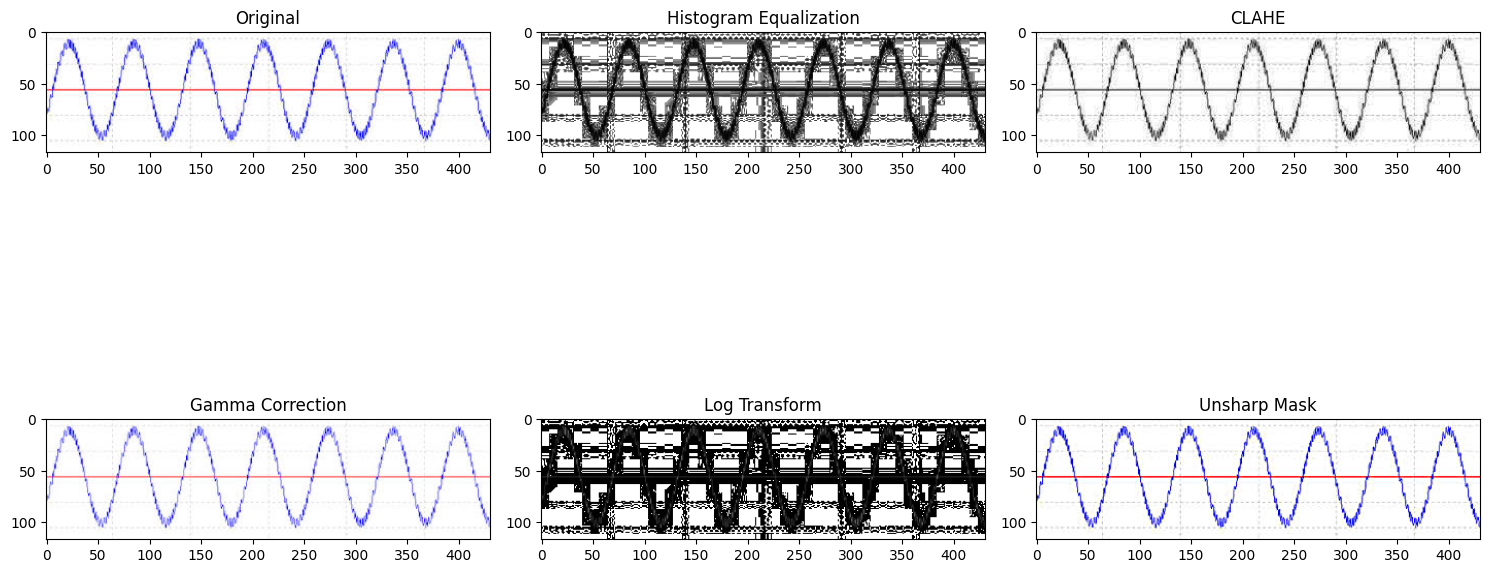

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(2,3,2)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalization")

plt.subplot(2,3,3)
plt.imshow(clahe_eq, cmap='gray')
plt.title("CLAHE")

plt.subplot(2,3,4)
plt.imshow(gamma_corrected)
plt.title("Gamma Correction")

#Log Correction
# Add a small constant to avoid log(0)
c = 255 / np.log(1 + np.max(gray) + 1e-6)
log_transformed = c * (np.log(1 + gray + 1e-6))
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.subplot(2,3,5)
plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transform")

plt.subplot(2,3,6)
plt.imshow(unsharp_image)
plt.title("Unsharp Mask")

plt.tight_layout()
plt.show()

/tmp/ipython-input-23-4178665178.py:2: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(gray))
/tmp/ipython-input-23-4178665178.py:2: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(gray))
/tmp/ipython-input-23-4178665178.py:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * (np.log(1 + gray))
/tmp/ipython-input-23-4178665178.py:3: RuntimeWarning: invalid value encountered in multiply
  log_transformed = c * (np.log(1 + gray))
/tmp/ipython-input-23-4178665178.py:4: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype=np.uint8)


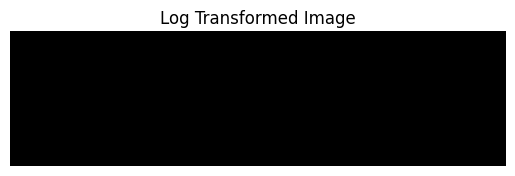

In [ ]:
#Log Correction
c = 255 / np.log(1 + np.max(gray))
log_transformed = c * (np.log(1 + gray))
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()